In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from importlib import reload

import TSManager as ts

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
reload(ts)
mgr = ts.TSManager()

In [3]:
mgr.load()

Loading DEF
Loading PCR
Loading CAPE
Loading IC
Loading CPI
Loading MA
Loading OIL
Loading CAY
Loading TERM
Loading NOS
Loading VRP
Loading BDI
Loading PE
Loading BM
Loading SPX
Loading SI
Loading DP
Loading PCAPrice
Loading BY


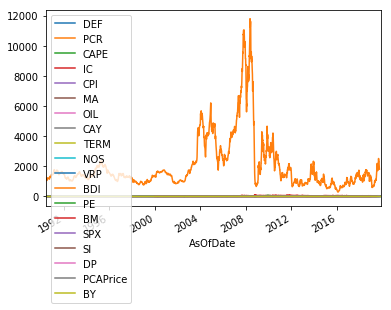

In [4]:
mgr.data.plot()

Text(0.5, 1.0, 'Percent missing data by feature')

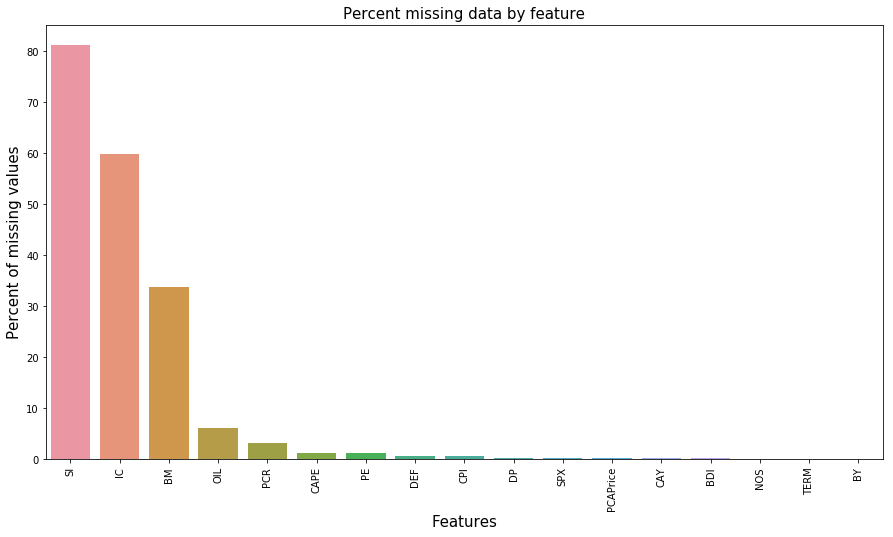

In [5]:
all_data_na = (mgr.data.isna().sum() / len(mgr.data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:17]
f, ax = plt.subplots(figsize=(15, 8))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [16]:
#future return
data=mgr.data.copy()
data['R_1M']=data['SPX'].index.map(
lambda x: (1+data.truncate(before=x + pd.Timedelta(1,unit='d'), after=x + pd.Timedelta(30,unit='d'))['SPX']).prod()-1)
data['R_3M']=data['SPX'].index.map(
lambda x: (1+data.truncate(before=x + pd.Timedelta(1,unit='d'), after=x + pd.Timedelta(91,unit='d'))['SPX']).prod()-1)
data['R_6M']=data['SPX'].index.map(
lambda x: (1+data.truncate(before=x + pd.Timedelta(1,unit='d'), after=x + pd.Timedelta(182,unit='d'))['SPX']).prod()-1)
data['R_12M']=data['SPX'].index.map(
lambda x: (1+data.truncate(before=x + pd.Timedelta(1,unit='d'), after=x + pd.Timedelta(365,unit='d'))['SPX']).prod()-1)

In [20]:
data['R_1M'][-27:]=np.nan
data['R_3M'][-27:]=np.nan
data['R_6M'][-27:]=np.nan
data['R_12M'][-27:]=np.nan

C:\Users\xjl05\AppData\Local\conda\conda\envs\python353\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\xjl05\AppData\Local\conda\conda\envs\python353\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\xjl05\AppData\Local\conda\conda\envs\python353\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [21]:
data.to_pickle('data.pkl')